In [537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data_frame = pd.read_csv("Wine.csv")

data_frame.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [538]:
data_frame.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [539]:
data_frame.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [540]:
data_frame.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [541]:
data_frame.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Gráficamos todas las columnas para visualizar de que manera están distribuidos los datos

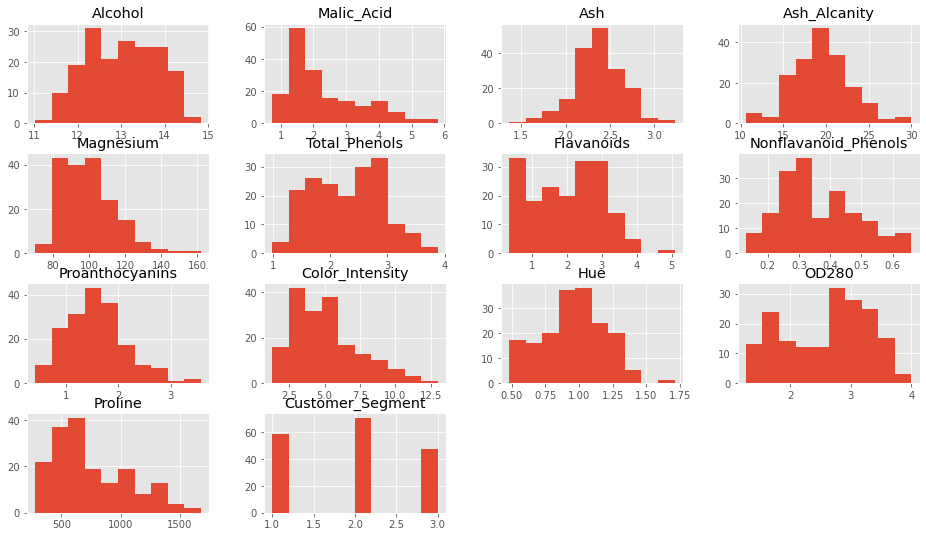

In [542]:
data_frame.hist()
plt.show()

Graficamos nuevamente todas las columnas para ver cuales podemos usar.

In [ ]:
sb.pairplot(data_frame.dropna(), hue="Customer_Segment", height=4,kind="scatter")



Graficamos las columnas que usaremos. En este caso se procedió a seleccionar las columnas `Ash`, `Ash_Alcanity`, `Magnesium`, `Total_Phenols` y `Proline`

In [ ]:
sb.pairplot(data_frame.dropna(), hue="Customer_Segment", height=4, vars=["Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Proline"],kind="scatter")

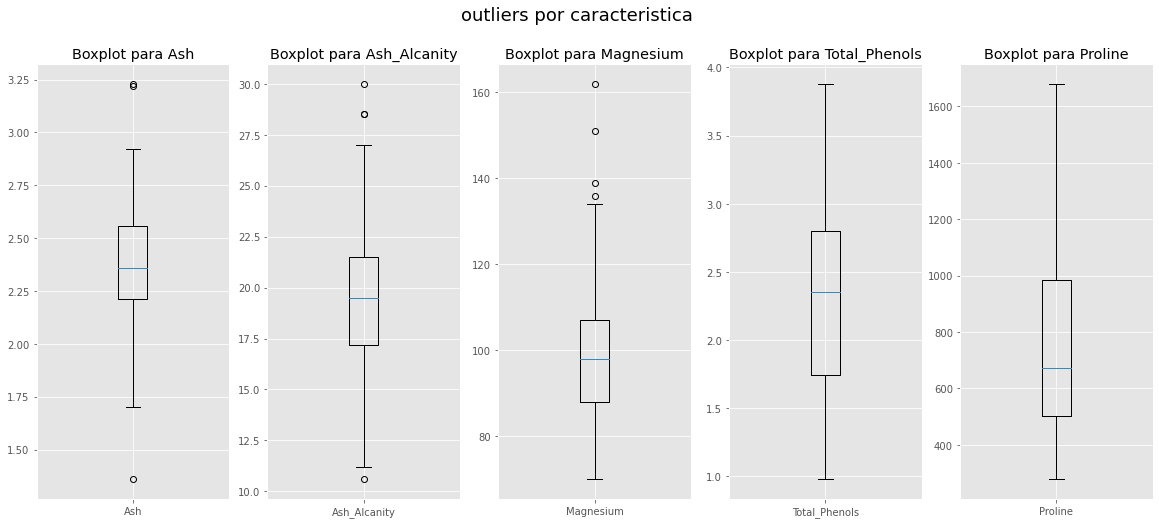

In [543]:
i = 0
j = 0
fig, ax = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle('outliers por caracteristica', fontsize=18)
for col in ["Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Proline"]:
    ax[i].set_title('Boxplot para ' + col)
    ax[i].boxplot(data_frame[col], labels=[col])
    i=i+1
plt.show()

Calculamos los bigotes superiores e inferiores de cada columna y luego procedemos a dropear o eliminar
los valores por columna que se encuentren fuera de estos limites (Upper y lower whisker)

In [544]:
for column in ["Ash", "Ash_Alcanity", "Magnesium", "Proline"]:
    # Fist Quartile
    Q1 = data_frame[column].quantile(0.25)
    # Third Quartile
    Q3 = data_frame[column].quantile(0.75)
    # Interquartile Range
    IQR = Q3 - Q1
    # Upper Whisker
    UW = Q3 + 1.5 * IQR
    # Lower Whisker
    LW = Q1 - 1.5 * IQR

    data_frame = data_frame.drop(data_frame[data_frame[column] < LW].index)
    data_frame = data_frame.drop(data_frame[data_frame[column] > UW].index)

In [545]:
data_frame.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,13.031412,2.372529,2.365588,19.393529,98.488235,2.288588,2.013824,0.362294,1.568882,5.138882,0.950212,2.601294,748.682353,1.941176
std,0.811147,1.126030,0.243590,3.038961,12.240798,0.629145,0.982868,0.123787,0.550059,2.328897,0.229733,0.713145,319.407114,0.789771
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.370000,1.610000,2.222500,17.200000,88.000000,1.705000,1.125000,0.270000,1.242500,3.255000,0.772500,1.922500,500.500000,1.000000
50%,13.060000,1.870000,2.360000,19.500000,97.500000,2.355000,2.120000,0.340000,1.535000,4.850000,0.960000,2.780000,666.000000,2.000000
75%,13.705000,3.157500,2.540000,21.500000,106.000000,2.800000,2.875000,0.430000,1.937500,6.287500,1.117500,3.170000,1008.750000,3.000000
max,14.830000,5.800000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Guardamos los datos ya limpiados en un nuevo csv para trabajarlo posteriormente si es que fuera necesario

In [546]:
data_frame.to_csv('wine_clean.csv', sep=',', encoding='utf-8', index=False)

Graficamos en 3d para visualizar como están distribuidos los datos según las columnas que seleccionamos.

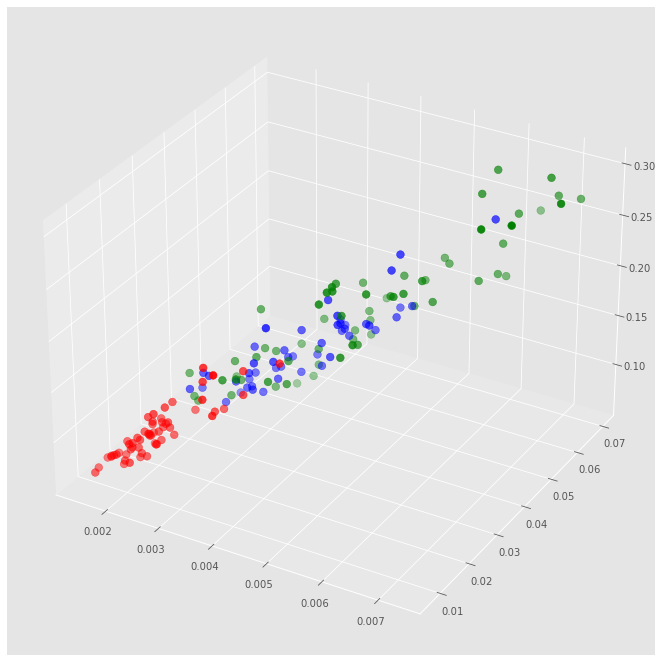

In [548]:
from sklearn import preprocessing
X = preprocessing.Normalizer().fit_transform(data_frame[["Ash", "Ash_Alcanity", "Magnesium", "Total_Phenols", "Proline"]])
X = np.array(X)
y = np.array(data_frame["Customer_Segment"])

fig = plt.figure()
ax = Axes3D(fig)
colors=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1.
asign=[]
for row in y:
    asign.append(colors[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asign,s=60)
plt.show()

Generamos dos métodos para graficar y obtener los clusteres. Primero graficamos por elbow, el cual se conoce por ser ambiguo
y no tan preciso y luego utilizamos el método de la silueta, el cual se conoce por ser más preciso que el anterior. En base al
análisis de estos 2 determinamos un número de 2 clusteres.

C:\Users\mguti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


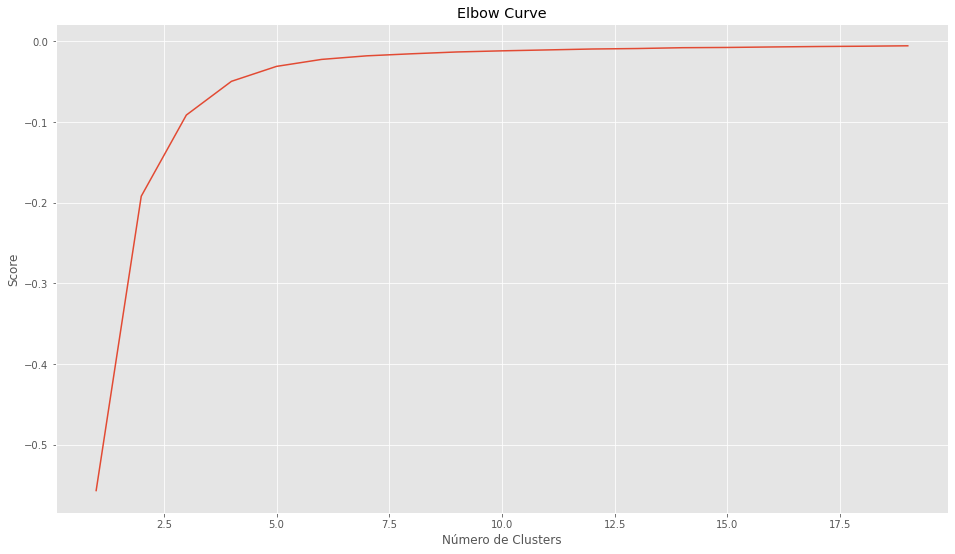

In [549]:
from sklearn.cluster import KMeans
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter=400, random_state=42) for i in num_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(num_clusters,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

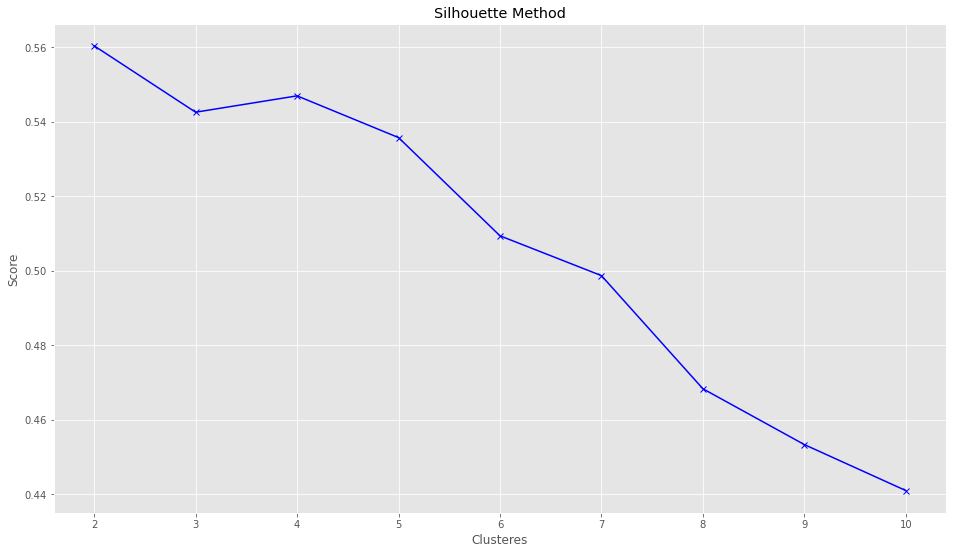

In [550]:
from sklearn.metrics import silhouette_score

silhouette = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=400, random_state=42).fit(X)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))
plt.plot(K, silhouette, 'bx-')
plt.xlabel("Clusteres")
plt.ylabel("Score")
plt.title("Silhouette Method")
plt.show()

In [551]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, max_iter=400, random_state=42)
model.fit(X)
pred = model.predict(X)

Graficamos en 3d nuevamente y vemos de que manera los clusteres quedaron distribuidos de acuerdo a la cantidad de datos seleccionada.

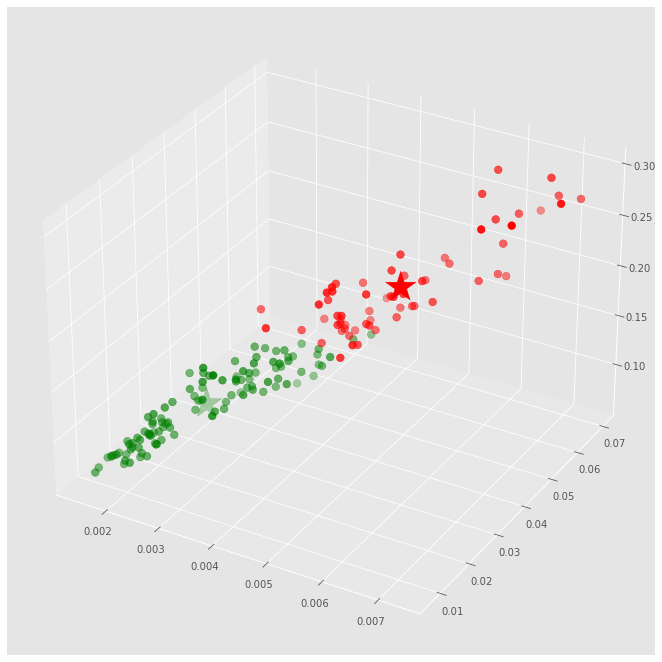

In [552]:
C = model.cluster_centers_
# 5 colores porque k = 5
colors=['red','green']
asign=[]

for row in pred:
    asign.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asign,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colors, s=1000)
plt.show()

Graficamos marcando el centroide de los clusteres esta vez en 2. En este caso para el eje X le asignamos la columna de `Ash`
y para el eje Y le asignamos la columna de `Magnesium`

Text(0.5, 1.0, 'Customer Clusters')

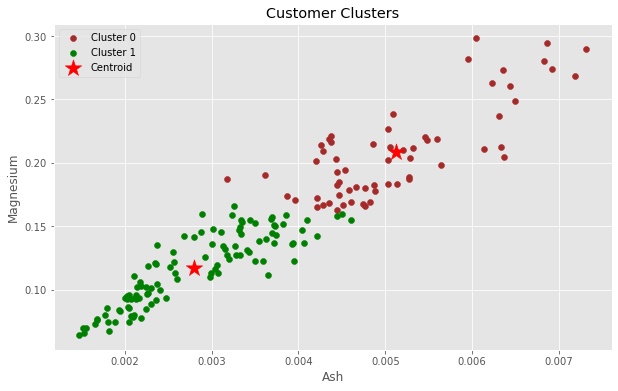

In [558]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 2], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 2], c = 'green', label = 'Cluster 1')


plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 2],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Ash')
plt.ylabel('Magnesium')
plt.legend()
plt.title('Customer Clusters')

En base a lo graficado y observado anteriormente podemos indicar que los vinos se pueden clasificar en 2 tipos. El primero en el cual hay una tendencia
a preferir niveles más bajos de cenizas junto con niveles más bajos de magnesio. Es por esto que podemos indicar que estas caracteristicas son determinantes
en la clasificación de un vino.
